In [35]:
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns 
import numpy as np 



In [36]:
df = pd.read_csv("/Users/arpitgupta/Documents/vechile insurance/notebook/data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [37]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [38]:
df.shape

(381109, 12)

In [39]:
df.isnull().sum()
## checking for all the null values 

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [40]:
value_counts = df['Response'].value_counts()

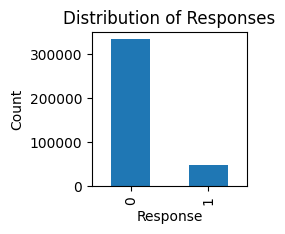

In [41]:
plt.figure(figsize=(2, 2))

# Create the bar plot
value_counts.plot(kind='bar')

# Customize the plot (optional)
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Distribution of Responses')

# Show the plot
plt.show()

<Axes: >

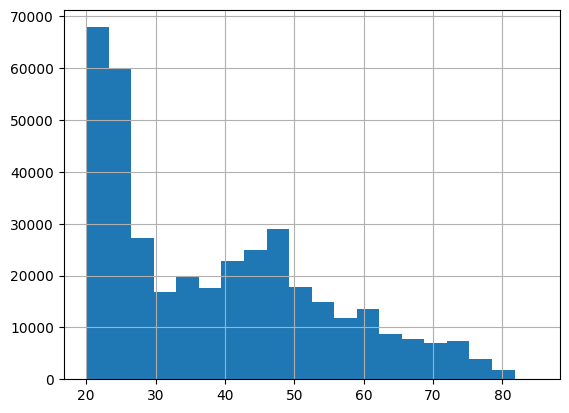

In [42]:
# age distribution 
df['Age'].hist(bins=20)

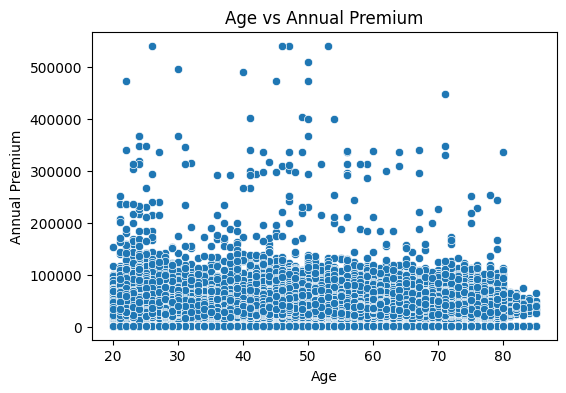

In [43]:
# Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Annual_Premium', data=df)
plt.title('Age vs Annual Premium')
plt.xlabel('Age')
plt.ylabel('Annual Premium')
plt.show()


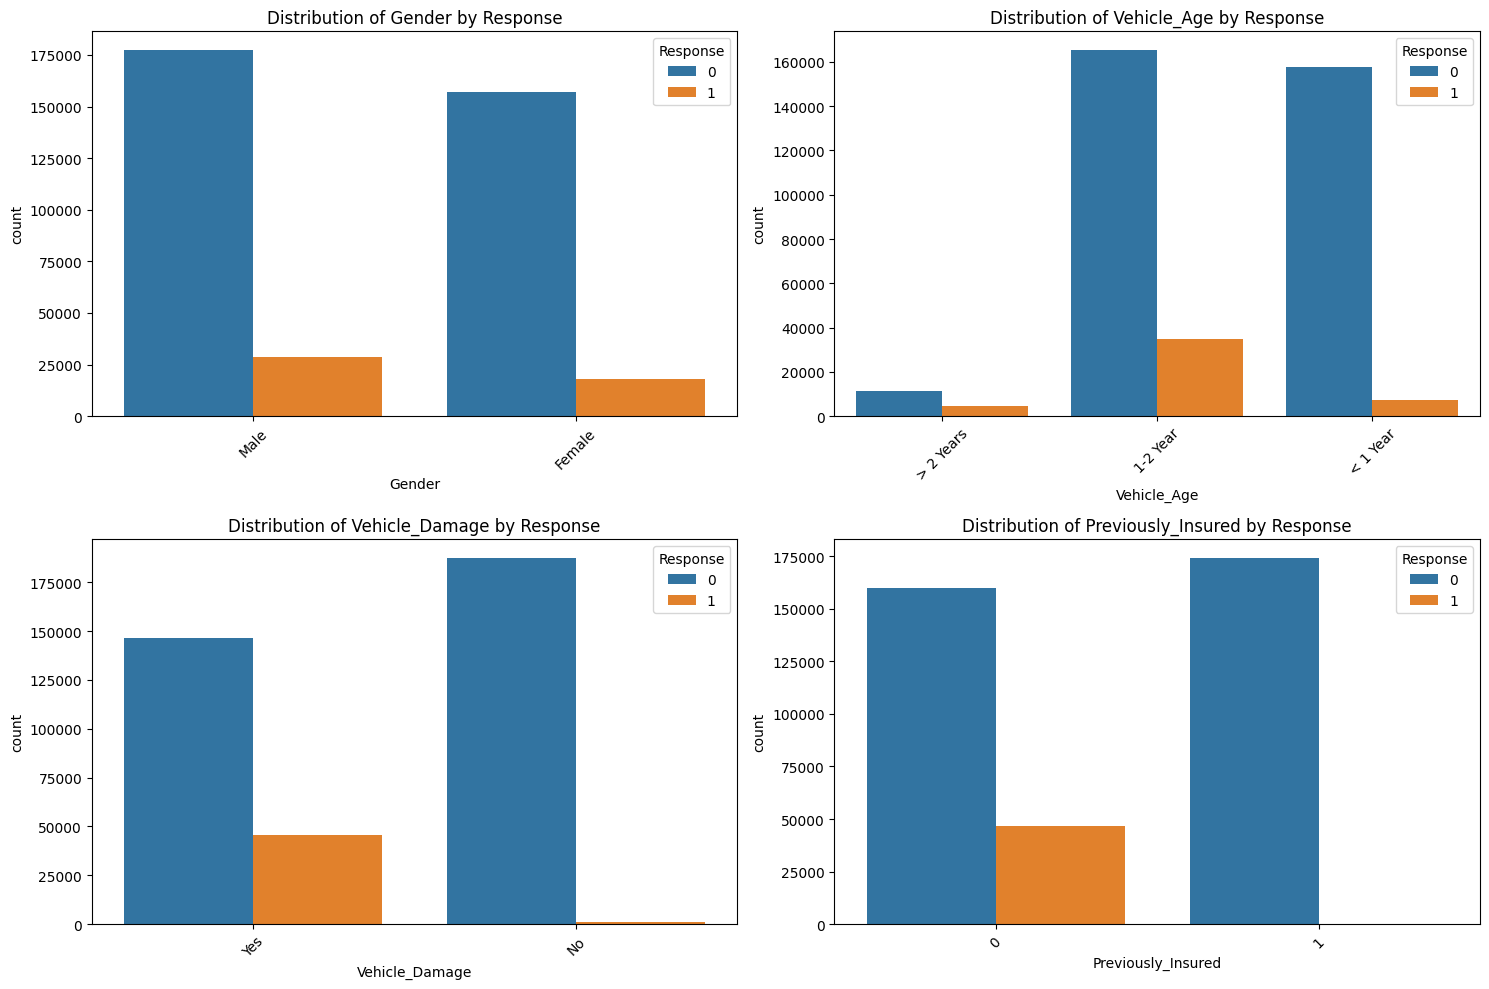

In [44]:
# Analyze categorical variables
categorical_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Previously_Insured']

# Create subplots for each categorical variable
plt.figure(figsize=(15, 10))
for idx, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, idx)
    sns.countplot(data=df, x=col, hue='Response')
    plt.title(f'Distribution of {col} by Response')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

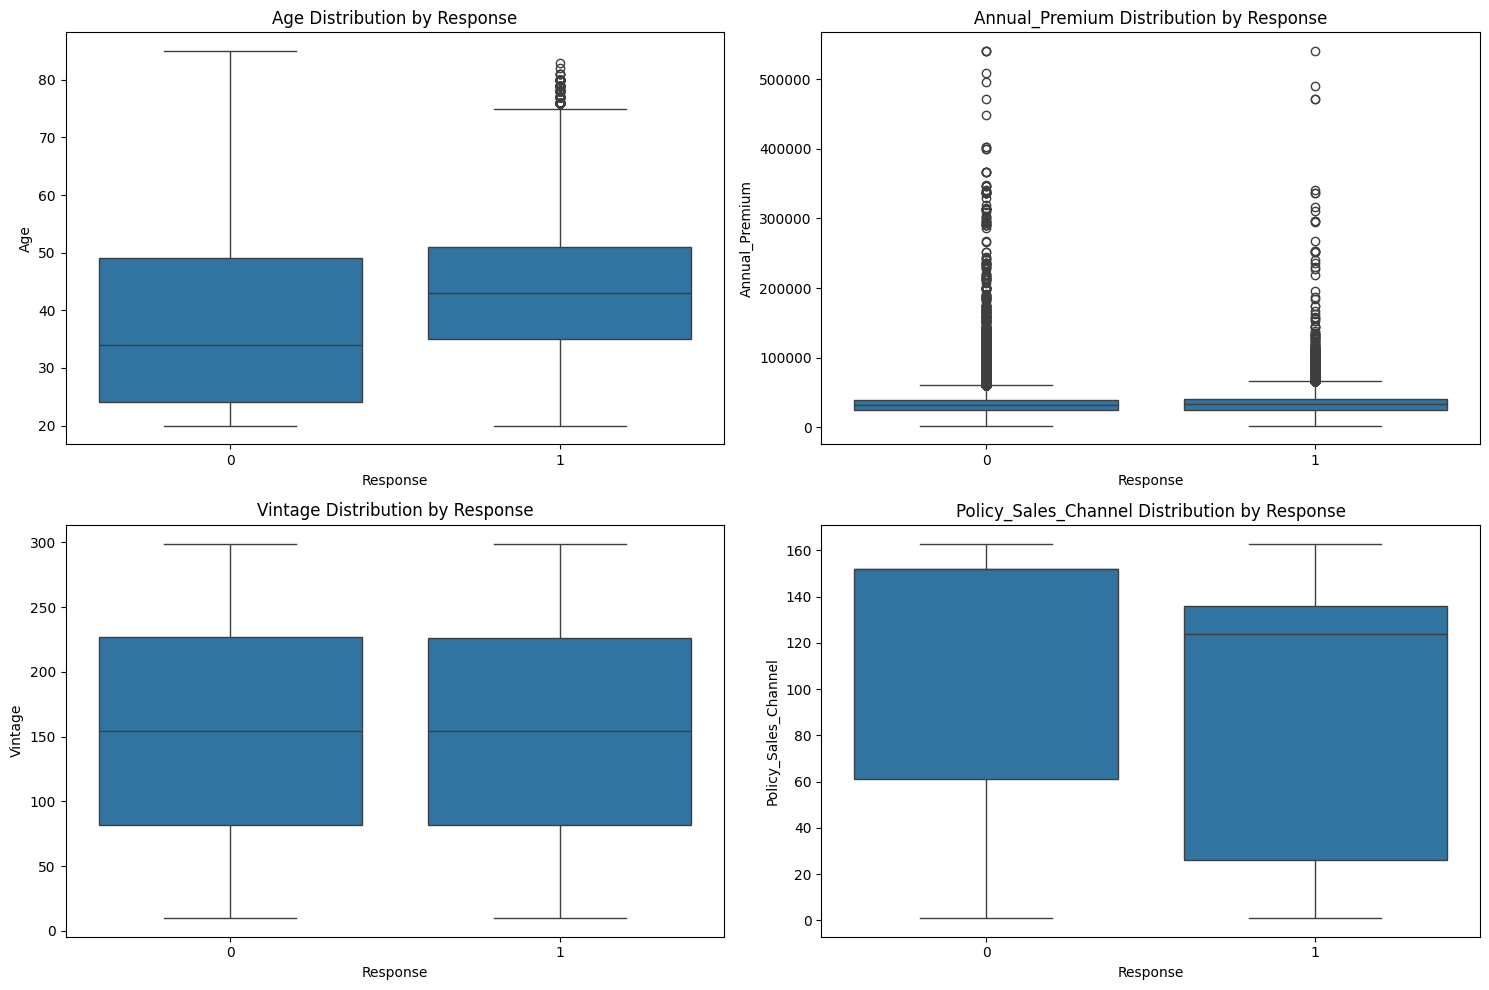

ValueError: could not convert string to float: 'Male'

<Figure size 1000x800 with 0 Axes>

In [45]:
# Analyze numerical variables
numerical_cols = ['Age', 'Annual_Premium', 'Vintage', 'Policy_Sales_Channel']

# Create box plots
plt.figure(figsize=(15, 10))
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, idx)
    sns.boxplot(data=df, x='Response', y=col)
    plt.title(f'{col} Distribution by Response')
plt.tight_layout()
plt.show()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

DATA - PREPROCESSING 

In [34]:

num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
'Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [46]:
# mapping 'Gender' col to (0, 1) values
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df.head(2)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [47]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Vehicle_Age >> object
Vehicle_Damage >> object
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64


In [48]:
# creating dummy cols for categorical features

df=pd.get_dummies(df,drop_first=True)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False


In [49]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64
Vehicle_Age_< 1 Year >> bool
Vehicle_Age_> 2 Years >> bool
Vehicle_Damage_Yes >> bool


In [50]:
# cols renaming and keeping dtype as int

df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year'] = df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years'] = df['Vehicle_Age_gt_2_Years'].astype('int')
df['Vehicle_Damage_Yes'] = df['Vehicle_Damage_Yes'].astype('int')

for column in cat_feat:
    df[column] = df[column].astype('str')

Scaling the data 

In [54]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler, LabelEncoder
ss = StandardScaler()
df[num_feat] = ss.fit_transform(df[num_feat])

mm = MinMaxScaler()
df['Annual_Premium'] = mm.fit_transform(df[['Annual_Premium']])

## dropping the id column 
id = df.id 
df=df.drop('id',axis=1)

In [56]:
## train - test split 
from sklearn.model_selection import train_test_split 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(X.shape)
print(y.shape)

(381109, 11)
(381109,)


In [65]:
X_train,X_test,y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(304887, 11) (76222, 11) (304887,) (76222,)


Model trainer 

In [59]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#from xgboost import XGBClassfier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [66]:

# Now the model training should work
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.9072577471071345


In [70]:
clf1 = LogisticRegression()
clf1.fit(X_train,y_train)

y_pred = clf1.predict(X_test)
print(accuracy_score(y_test,y_pred))

/Users/arpitgupta/Documents/vechile insurance/myenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9101309333263362


In [71]:
clf2 = GradientBoostingClassifier(n_estimators=100,random_state=42)

clf2.fit(X_train,y_train)

y_pred = clf2.predict(X_test)
print(accuracy_score(y_test,y_pred))

clf3 = AdaBoostClassifier(n_estimators=100,random_state=42)
clf3.fit(X_train,y_train)

y_pred = clf3.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9124399779591195


/Users/arpitgupta/Documents/vechile insurance/myenv/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.9123087822413476


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

